# Project -- Comcast Telecom Consumer Complaints 



In [1]:
# To perform various tasks, we have to import some important python libraries
# Numpy is for Numerical Python, Pandas for handling large data sets/Dataframe 
# Matplotlib and Seaborn helps to create interactive plots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To display the plot in jupyter notebook
%matplotlib inline 

### Task_1 : Import data into Python environment

In [2]:
# Read the csv file
df_complaints = pd.read_csv("D:/Python for Data Science/Live Class/Comcast_telecom_complaints_data.csv")

In [3]:
# Head() will show 1st 5 rows in a dataset
df_complaints.head() 

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
# For creating new column " date_index",by concatinating "Date_month_year" & "Time" columns
df_complaints["date_index"] = df_complaints["Date_month_year"] + " " + df_complaints["Time"]

# To typecast "date_index" column to date-time format
df_complaints["date_index"] = pd.to_datetime(df_complaints["date_index"])
df_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [5]:
# To check the data type
df_complaints.dtypes
# As we can see the "date_index" column is changed to datetime format

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [6]:
# Typecasting "Date_month_year" column in datetime format
df_complaints["Date_month_year"] = pd.to_datetime(df_complaints["Date_month_year"])

# Using "date_index" column as index number of the dataset as any unique data can be used as index
df_complaints = df_complaints.set_index(df_complaints["date_index"])

df_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [7]:
df_complaints.dtypes # Date_month_year data type changed to date time format

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

### Task_2 - Provide the trend chart for the number of complaints at monthly and daily granularity levels.
       -trend chart for the number of complaints at monthly granularity levels
       -trend chart for the number of complaints at daily granularity levels

#### Trend chart for the number of complaints at Monthly granularity levels

In [8]:
# Frequency of number of complaints at monthly granularity levels
df_complaints.groupby(pd.Grouper(freq="M")).size() # here freq = M is for monthly levels

date_index
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
2015-08-31      67
2015-09-30      55
2015-10-31      53
2015-11-30      38
2015-12-31      65
Freq: M, dtype: int64

#### =>So,Clearly we can see max number of complaints in month of June

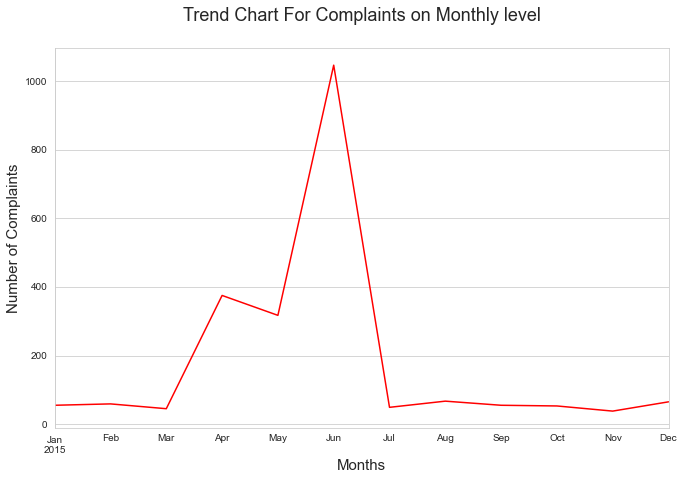

In [9]:
# To plot the trend chart for the Frequency of number of complaints at monthly granularity levels
sns.set_style('whitegrid') # For white grid in background
df_complaints.groupby(pd.Grouper(freq="M")).size().plot(figsize = (11,7), color = 'red', alpha = 1.0)

plt.xlabel('Months',size=15)  # to set x axis as Months 

plt.ylabel('Number of Complaints',size=15) # to set y axis as Number of Complaints

plt.title('Trend Chart For Complaints on Monthly level\n',size = 18) # Title of the plot
plt.show()

#### Trend chart for the number of complaints at Daily granularity levels
      
      

In [10]:
# Creating new column "Day_of_month" by typecasting "Date" column to datetime format
df_complaints['Day_of_Month'] = pd.to_datetime(df_complaints["Date"])

# Setting "Day_of_Month" as index
df_complaints = df_complaints.set_index(df_complaints["Day_of_Month"])
df_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Day_of_Month
Day_of_Month,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,2015-04-22
2015-04-08,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,2015-04-08
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,2015-04-18
2015-05-07,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,2015-05-07
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,2015-05-26


In [11]:
df_complaints['Day_of_Month'].value_counts() # For counting Max number of complaints day wise

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-10      7
2015-05-24      7
2015-04-05      6
2015-04-11      5
2015-05-03      5
Name: Day_of_Month, Length: 91, dtype: int64

#### Clearly we can see max number of complaints in the day of 24th of June

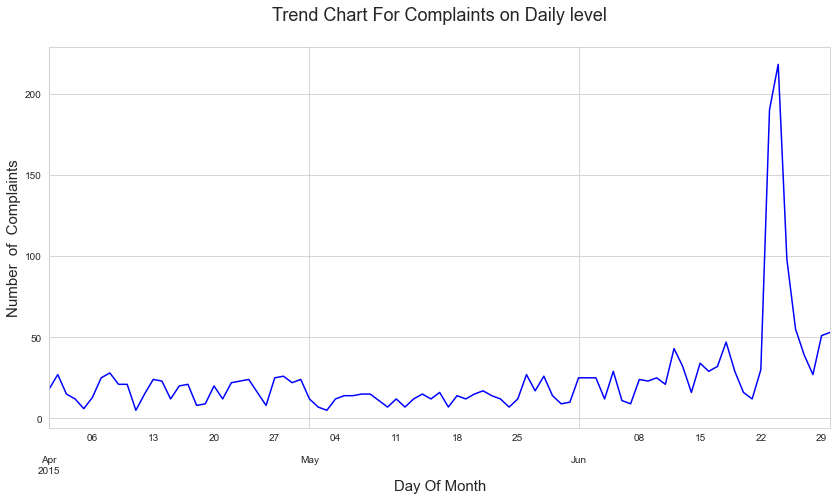

In [12]:
# To plot the trend chart for the Frequency of number of complaints at daily granularity levels
df_complaints.groupby(pd.Grouper(freq="D")).size().plot(figsize = (14,7), color = 'blue', alpha = 1.0) 

plt.xlabel('Day Of Month',size = 15)  # to set x axis as Day of Month 

plt.ylabel('Number  of  Complaints',size = 15) # to set y axis as Number  of  Complaints

plt.title('Trend Chart For Complaints on Daily level\n',size = 18) # Title of the plot
plt.show()

### Task_3 :  Provide a table with the frequency of complaint types

In [13]:
df_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Day_of_Month
Day_of_Month,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,2015-04-22
2015-04-08,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,2015-04-08
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,2015-04-18
2015-05-07,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,2015-05-07
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,2015-05-26


In [14]:
complaint_type = df_complaints["Customer Complaint"].value_counts() # value_counts will count type of customer complaints 

In [15]:
complaint_type.head(25) # To see the frequency of Complaint types

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Billing             11
Data Caps                   11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data cap             8
Comcast internet             8
Internet speed               8
Comcast data caps            8
Comcast/Xfinity              8
Data Cap                     8
Billing                      6
Comcast Service              6
Comcast billing              6
COMCAST                      6
Comcast service              6
Comcast Internet Service     5
Comcast complaint            5
Comcast Complaint            5
Internet Speed               5
availabilty                  4
Comcast Issues               4
Name: Customer Complaint, dtype: int64

##### As Python is case-sensitive so, it is treating COMCAST and comcast as two different complaints.If all complaints are changed to upper case then it will give the correct count.

In [16]:
complaint_type = df_complaints['Customer Complaint'].str.upper().value_counts() # Changing to uppercase

In [17]:
complaint_type.head(25) # It will show the real frequency of Complaint types

COMCAST                             102
COMCAST DATA CAP                     30
COMCAST INTERNET                     29
COMCAST DATA CAPS                    21
COMCAST BILLING                      18
COMCAST SERVICE                      15
INTERNET SPEED                       15
UNFAIR BILLING PRACTICES             13
DATA CAPS                            13
DATA CAP                             12
COMCAST COMPLAINT                    11
COMCAST/XFINITY                      11
COMCAST INTERNET SERVICE             10
BILLING                               9
BILLING ISSUES                        8
COMCAST CABLE                         5
INTERNET                              5
COMCAST BILLING COMPLAINT             5
COMCAST ISSUES                        5
COMCAST BILLING PRACTICES             5
SERVICE ISSUES                        5
SLOW INTERNET                         5
INTERNET SERVICE                      5
COMPLAINT AGAINST COMCAST             5
COMCAST UNFAIR BILLING PRACTICES      4


### Q-1: Which complaint types are maximum i.e., around internet, network issues, or across any other domains?
### Answer  = From above Conclusion, Frequency of Complaints  are maximum  around  Comcast > Comcast data Cap > Comcast Internet > Comcast data Cap > Comcast Billing > Comcast Service > Internet Speed   etc.

### Task-4 : Create a new categorical variable with value as Open and Closed
      --Open & Pending is to be categorized as Open &
      --Closed & Solved is to be categorized as Closed

In [18]:
df_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Day_of_Month
Day_of_Month,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,2015-04-22
2015-04-08,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,2015-04-08
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,2015-04-18
2015-05-07,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,2015-05-07
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,2015-05-26


In [19]:
# Open & Pending Category will be categorized as Open, else status is closed 
# It will save in new categorical variable as column "NewStatus"
df_complaints["NewStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df_complaints["Status"]]

In [20]:
df_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Day_of_Month,NewStatus
Day_of_Month,,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,2015-04-22,Closed
2015-04-08,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,2015-04-08,Closed
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,2015-04-18,Closed
2015-05-07,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,2015-05-07,Open
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,2015-05-26,Closed


### Task-5 : Provide state wise status of complaints in a stacked bar chart using the categorical variable from above

In [21]:
df_status = df_complaints.groupby('State').NewStatus.value_counts().unstack() # unstack() will make the column in proper form
df_status.head(25)

NewStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


<Figure size 1584x7200 with 0 Axes>

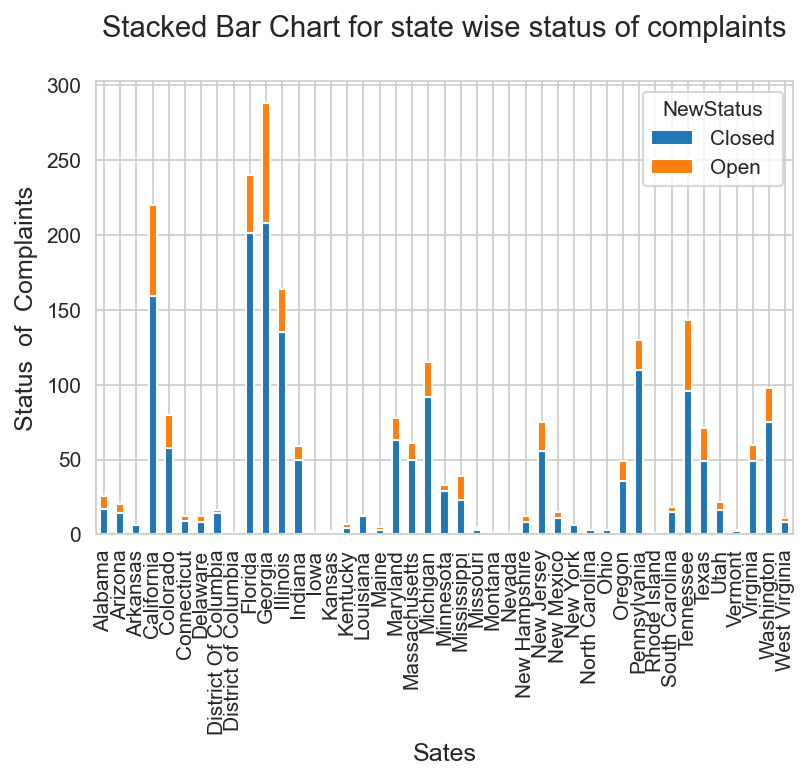

In [22]:
plt.figure(figsize=(22,100)) 
plt.rcParams['figure.dpi'] = 150
# Stacked = True for Stacked Plot
df_status.plot(kind='bar', stacked=True) 
plt.xlabel('Sates',size = 12)  # x axis is for Month 

plt.ylabel('Status  of  Complaints',size = 12) # y axis is random numbers

plt.title('Stacked Bar Chart for state wise status of complaints\n',size = 14) # Title of the plot
plt.show()

## Q_2 : Which state has the maximum complaints? 
### Answer = Georgia has maximum number of complaints.


## Q_3 :  Which state has the highest percentage of unresolved complaints?

In [23]:
# Unresolved complaints distribution across State
df_unresolved = df_complaints[df_complaints['NewStatus']=='Open']
df_unresolved.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Day_of_Month,NewStatus
Day_of_Month,,,,,,,,,,,,,,
2015-05-07,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,2015-05-07,Open
2015-06-24,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,2015-06-24 10:13:55,2015-06-24,Open
2015-06-28,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,2015-06-28 18:46:31,2015-06-28,Open
2015-06-13,339282,Comcast Violating Open Internet Rules by Block...,13-06-15,2015-06-13,4:03:18 PM,Internet,Albuquerque,New Mexico,87105,Open,Yes,2015-06-13 16:03:18,2015-06-13,Open
2015-06-27,370137,Internet complaint,27-06-15,2015-06-27,3:25:03 PM,Customer Care Call,Albuquerqur,New Mexico,87102,Pending,No,2015-06-27 15:25:03,2015-06-27,Open


In [24]:
df_unresolved = df_unresolved['State'].value_counts()
df_unresolved.head(25)

Georgia          80
California       61
Tennessee        47
Florida          39
Illinois         29
Michigan         23
Washington       23
Texas            22
Colorado         22
Pennsylvania     20
New Jersey       19
Mississippi      16
Maryland         15
Oregon           13
Massachusetts    11
Virginia         11
Indiana           9
Alabama           9
Arizona           6
Utah              6
New Hampshire     4
Delaware          4
Minnesota         4
New Mexico        4
Connecticut       3
Name: State, dtype: int64

### Q_3 : Answer = Georgia has the highest percentage of unresolved complaints

### Percentage of complaints unresolved till date

In [25]:
((df_unresolved/df_complaints.shape[0])*100) # shape(0) = it gives the total number of complaints

Georgia                 3.597122
California              2.742806
Tennessee               2.113309
Florida                 1.753597
Illinois                1.303957
Michigan                1.034173
Washington              1.034173
Texas                   0.989209
Colorado                0.989209
Pennsylvania            0.899281
New Jersey              0.854317
Mississippi             0.719424
Maryland                0.674460
Oregon                  0.584532
Massachusetts           0.494604
Virginia                0.494604
Indiana                 0.404676
Alabama                 0.404676
Arizona                 0.269784
Utah                    0.269784
New Hampshire           0.179856
Delaware                0.179856
Minnesota               0.179856
New Mexico              0.179856
Connecticut             0.134892
West Virginia           0.134892
South Carolina          0.134892
Kentucky                0.134892
Maine                   0.089928
District Of Columbia    0.089928
Missouri  

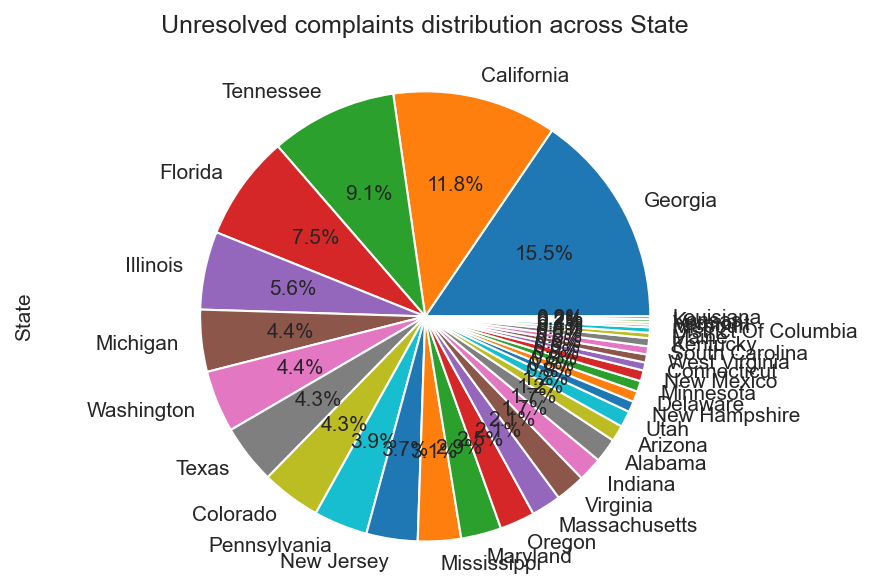

In [26]:
# Percentage of complaints unresolved till date in a Pie Chart
df_unresolved.plot(kind='pie',autopct='%2.1f%%')
plt.axis('equal')
plt.title('Unresolved complaints distribution across State\n')
plt.tight_layout()
plt.show()

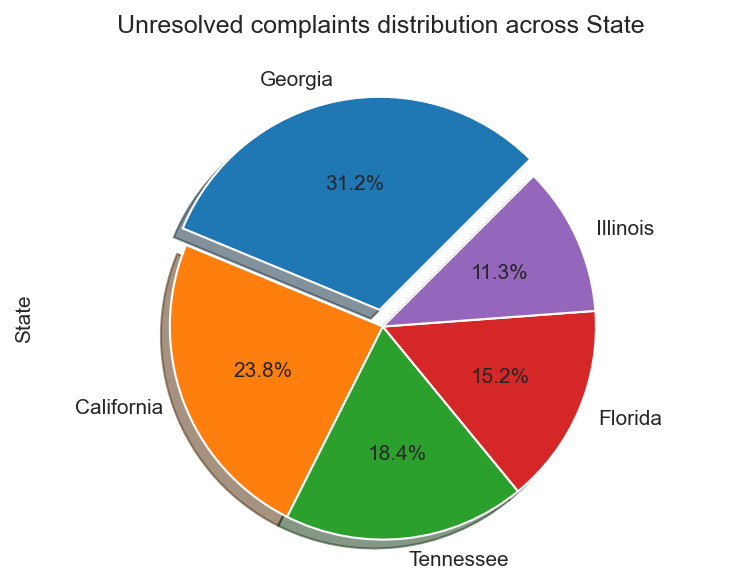

In [27]:
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa']
df_unresolved.head().plot(kind='pie',autopct='%2.1f%%',
                explode = (0.08, 0, 0, 0, 0), startangle=45, shadow=True, figsize = (5,4)) # explode will mark the highest
plt.axis('equal')
plt.title('Unresolved complaints distribution across State\n')
plt.tight_layout()
plt.show()

### So , Georgia has maximum percentage of unresolved complaints

## Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [28]:
# Complaints received through only Internet and Customer Care Call
df_received = df_complaints[df_complaints['Received Via'].isin(['Internet','Customer Care Call'])]
df_received.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Day_of_Month,NewStatus
Day_of_Month,,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,2015-04-22,Closed
2015-04-08,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,2015-04-08,Closed
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,2015-04-18,Closed
2015-05-07,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,2015-05-07,Open
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,2015-05-26,Closed


In [29]:
df_received.NewStatus.value_counts() # Provides the Status of Complaints

Closed    1707
Open       517
Name: NewStatus, dtype: int64

In [30]:
# Only Provide the Closed/Resolved Complaints
df_resolved = df_received[df_received['NewStatus']=='Closed']
df_resolved.NewStatus.value_counts()

Closed    1707
Name: NewStatus, dtype: int64

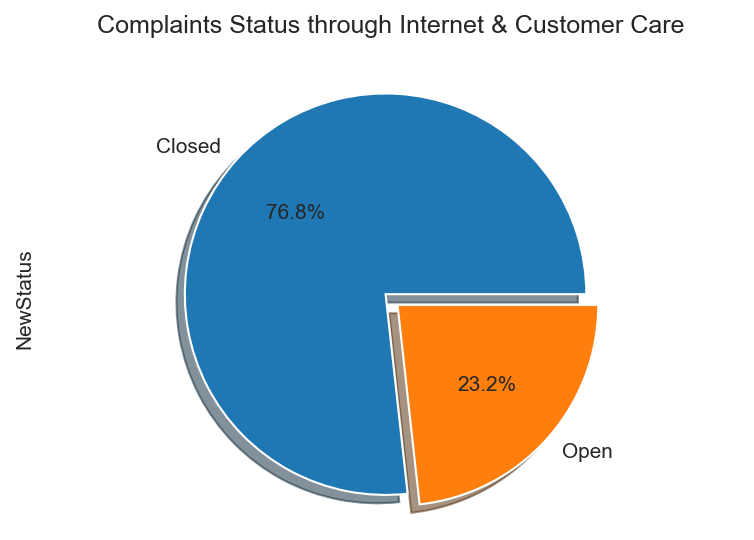

In [31]:
df_received.NewStatus.value_counts().plot(kind='pie',autopct='%1.1f%%',
                        figsize = (6,4), explode = (0.08,0), shadow=True)
plt.axis('equal')
plt.title('Complaints Status through Internet & Customer Care\n')
plt.show()

## So the percentage of complaints resolved till date, which were received through the Internet and customer care calls = 76.8%